<font color='Blue'>

# <center>The Sparks Foundation</center>

</font>

<font color='red'>

# <center>Exploratory Data Analysis_Indian Premier League</center>

</font>
    

<img src="TSF GRIP tasks_5.png" width="800" height="400">

<font color='blue'>

## Aim: Suggest the teams or players a company should endorse for its products

<font color='red'>

### Objectives: 

<font color='brown'>

* ***Find out the most successful teams***
* ***Find out the most successful players***
* ***Find out the factors that contributing win or loss of a team***
* ***Create a dashboard for an easy interactive visualizations***

### Dataset_Link: https://bit.ly/34SRn3b

<font color='red'>


## Part-1: Data Understanding and Preparation

In [1]:
#Import necessary libraries.
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df_mat = pd.read_csv('Data/matches.csv')
df_del = pd.read_csv('Data/deliveries.csv')

In [3]:
#check the matches dataframe
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

<font color='red'>

**Total 756 records with 18 columns in the matches dataset. Missing values exist in this dataset.**

In [4]:
#quick inspection of the dataframe
df_mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
#check for the missing values
df_mat.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

<font color='red'>

* **There are some missing values from the matches dataset, and all are categorical columns.**     
* **Instead of replacing the null values with the most frequent item, find out the item using the other columns.**    
* **Umpire columns are not relevant to this study's aim, so umpire1,2, &3 columns will be deleted.**

In [6]:
df_mat.drop(columns = ['umpire1','umpire2','umpire3'], inplace=True)# drop the umpire columns

In [7]:
#Check the venue when the city name missing. 
df_mat.loc[df_mat['city'].isnull()]['venue']

461    Dubai International Cricket Stadium
462    Dubai International Cricket Stadium
466    Dubai International Cricket Stadium
468    Dubai International Cricket Stadium
469    Dubai International Cricket Stadium
474    Dubai International Cricket Stadium
476    Dubai International Cricket Stadium
Name: venue, dtype: object

In [8]:
df_mat.loc[df_mat['venue']=='Dubai International Cricket Stadium']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


<font color='red'>

**It is clear that, in 2014, seven matches were held at Dubai International Cricket Stadium, not having a city name, so filled the city missing values with Dubai.**

In [9]:
df_mat['city'].fillna('Dubai', inplace=True)#fill the city missing values with 'Dubai'

In [10]:
df_mat.loc[df_mat['winner'].isnull()] #checking records from winner missing values 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


In [11]:
#list the match ids to check innings data to find out the winner team to fill the missing values.
winner_missing_id_lst = df_mat.loc[df_mat['winner'].isnull()]['id'].values.tolist()

In [12]:
#Check the maximum number of match overs that missing the winner's data.
df_del.loc[df_del['match_id'].isin(winner_missing_id_lst)].groupby(['match_id','inning'])[['over']].max()

over
match_id inning      
301      1         11
546      1         20
571      1         20
         2          2
11340    1          5
         2          4

In [13]:
df_mat.loc[df_mat['player_of_match'].isnull()] #checking records from player of the match missing values 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


<font color='red'>

**All four matches have not completed both innings to declare win team. So this missing value from the winner and player of the match columns is filled with NA.**

In [14]:
df_mat['winner'].fillna('NA', inplace = True)
df_mat['player_of_match'].fillna('NA', inplace = True)

In [15]:
df_mat.isnull().sum() #recheck the missing values.

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [16]:
df_mat['team1'].unique()  #Check the unique number of teams.

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

<font color='red'>

* **There is a typo error in `Rising Pune Supergiant`.', so rename the `Rising Pune Supergiants`.**  
* **`Delhi Daredevils` and `Delhi Capitals` are the same teams, so rename the Delhi Daredevils with Delhi Capitals.**

In [17]:
df_mat['team1'] = df_mat['team1'].apply(lambda x:x if ('Rising Pune' not in x) else 'Rising Pune Supergiant')
df_mat['team2'] = df_mat['team2'].apply(lambda x:x if ('Rising Pune' not in x) else 'Rising Pune Supergiant')
df_mat['toss_winner'] = df_mat['toss_winner'].apply(lambda x:x if ('Rising Pune' not in x) else 'Rising Pune Supergiant')
df_mat['winner'] = df_mat['winner'].apply(lambda x:x if ('Rising Pune' not in x) else 'Rising Pune Supergiant')

#update Delhi Daredevils with Delhi Capitals
df_mat['team1'] = df_mat['team1'].apply(lambda x:x if ('Delhi' not in x) else 'Delhi Capitals')
df_mat['team2'] = df_mat['team2'].apply(lambda x:x if ('Delhi' not in x) else 'Delhi Capitals')
df_mat['toss_winner'] = df_mat['toss_winner'].apply(lambda x:x if ('Delhi' not in x) else 'Delhi Capitals')
df_mat['winner'] = df_mat['winner'].apply(lambda x:x if ('Delhi' not in x) else 'Delhi Capitals')

In [18]:
df_mat.duplicated().sum()#check the for duplicated data

0

In [19]:
df_mat.describe() #check numeric value percentiles

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


<font color='red'>

**It is interesting to check the win_by_runs more than 100. the maximum of 146 runs win recorded.**

In [20]:
df_mat.sort_values('win_by_runs', ascending=False).head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium
556,557,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium
410,411,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium
706,11147,2019,Hyderabad,31/03/19,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,118,0,J Bairstow,Rajiv Gandhi Intl. Cricket Stadium
295,296,2011,Dharamsala,2011-05-17,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Kings XI Punjab,111,0,AC Gilchrist,Himachal Pradesh Cricket Association Stadium
114,115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium
676,7934,2018,Kolkata,09/05/18,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,102,0,Ishan Kishan,Eden Gardens
182,183,2010,Delhi,2010-03-17,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,98,0,SR Tendulkar,Feroz Shah Kotla


<font color='red'>

**It is interesting to see that, toss winning team lost the match by choosing the field first.**

In [21]:
#Check the unique count of the venue along with the city column.
df_mat.groupby(['city','venue']).count()['id']

city            venue                                               
Abu Dhabi       Sheikh Zayed Stadium                                     7
Ahmedabad       Sardar Patel Stadium, Motera                            12
Bangalore       M Chinnaswamy Stadium                                   66
Bengaluru       M Chinnaswamy Stadium                                    7
                M. Chinnaswamy Stadium                                   7
Bloemfontein    OUTsurance Oval                                          2
Cape Town       Newlands                                                 7
Centurion       SuperSport Park                                         12
Chandigarh      Punjab Cricket Association IS Bindra Stadium, Mohali    11
                Punjab Cricket Association Stadium, Mohali              35
Chennai         M. A. Chidambaram Stadium                                8
                MA Chidambaram Stadium, Chepauk                         49
Cuttack         Barabati Stadiu

<font color='red'>

* **Rename the Bangaluru with Bangalore.** 
* **Replace the Mohali with Chandigarh as both representing the same playing ground.**
* **There are different names for single playing ground, corrected the same.**

In [22]:
city_dict = {'Bengaluru':'Bangalore','Mohali':'Chandigarh'} #Create a dictionary for updating city names.

In [23]:
df_mat['city'] = df_mat['city'].apply(lambda x:city_dict[x] if x in city_dict.keys() else x) #update the city name

In [24]:
#Create a dictionary for updating venue names.
venue_update = {'Bangalore':'M. Chinnaswamy Stadium', 'Chandigarh':'Punjab Cricket Association Stadium, Mohali',
                'Chennai':'M. A. Chidambaram Stadium', 'Delhi':'Feroz Shah Kotla Ground', 
                'Hyderabad': 'Rajiv Gandhi Intl. Cricket Stadium', 'Pune': 'Maharashtra Cricket Association Stadium',
                'Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'}

In [25]:
#defined function for updating venue w.r.t city name
def update_venue_name(x):
    if x['city'] in venue_update.keys():
        x['venue'] = venue_update[x['city']]
    return (x['venue'])

In [26]:
df_mat['venue']= df_mat.apply(update_venue_name, axis=1) #update the venue column by correcting venue names

In [27]:
df_mat.groupby(['city','venue']).count()['id'] #check the unique value count of the venues

city            venue                                              
Abu Dhabi       Sheikh Zayed Stadium                                    7
Ahmedabad       Sardar Patel Stadium, Motera                           12
Bangalore       M. Chinnaswamy Stadium                                 80
Bloemfontein    OUTsurance Oval                                         2
Cape Town       Newlands                                                7
Centurion       SuperSport Park                                        12
Chandigarh      Punjab Cricket Association Stadium, Mohali             56
Chennai         M. A. Chidambaram Stadium                              57
Cuttack         Barabati Stadium                                        7
Delhi           Feroz Shah Kotla Ground                                74
Dharamsala      Himachal Pradesh Cricket Association Stadium            9
Dubai           Dubai International Cricket Stadium                     7
Durban          Kingsmead                   

<font color='red'>

**Except for Mumbai, every city/ location has only one venue. There are 3 different playgrounds from Mumbai.**

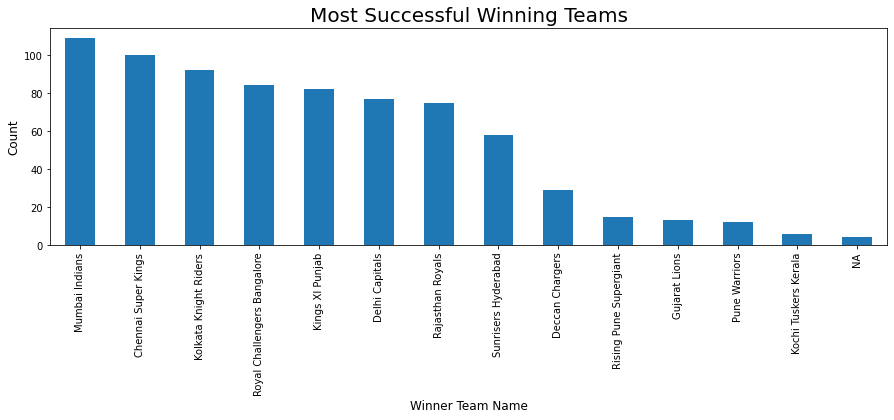

In [28]:
df_mat.groupby('winner').count()['id'].sort_values(ascending=False).plot(kind='bar', figsize=(15,4))
plt.title('Most Successful Winning Teams', fontsize=20)
plt.xlabel('Winner Team Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

<font color='red'>

**The most successful winning team is Mumbai Indians.**
* **Used Power BI for interactive visualization.**

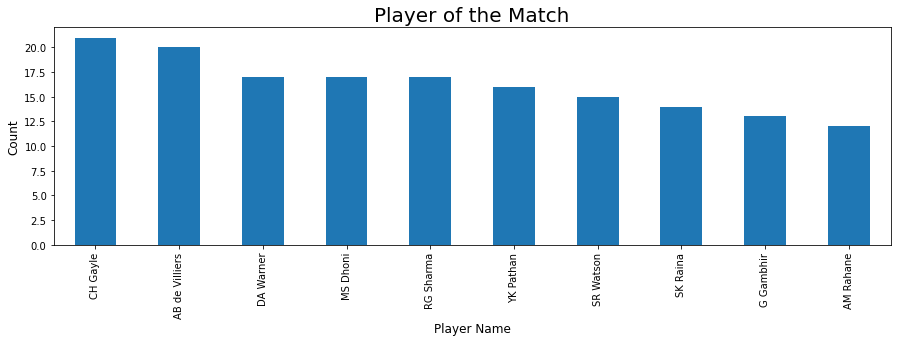

In [29]:
df_mat.groupby('player_of_match').count()['id'].sort_values(ascending=False)[:10].plot(kind='bar', figsize=(15,4))
plt.title('Player of the Match', fontsize=20)
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

<font color='red'>

**CH Gayle won the most number of player of the match.**
* **A detailed analysis will be done using Power BI.**

In [30]:
#This data frame contains each ball delivery record of all matches.
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [31]:
df_del.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


**The size of the dataset is (179,078 x 21)**

In [32]:
#Update the team names

df_del['batting_team'] = df_del['batting_team'].apply(lambda x:x if ('Rising Pune' not in x) else 'Rising Pune Supergiant')
df_del['bowling_team'] = df_del['bowling_team'].apply(lambda x:x if ('Rising Pune' not in x) else 'Rising Pune Supergiant')

#update Delhi Daredevils with Delhi Capitals
df_del['batting_team'] = df_del['batting_team'].apply(lambda x:x if ('Delhi' not in x) else 'Delhi Capitals')
df_del['bowling_team'] = df_del['bowling_team'].apply(lambda x:x if ('Delhi' not in x) else 'Delhi Capitals')

In [33]:
round(df_del.isnull().sum()/len(df_del.index)*100,3) #check for the missing values

match_id             0.000
inning               0.000
batting_team         0.000
bowling_team         0.000
over                 0.000
ball                 0.000
batsman              0.000
non_striker          0.000
bowler               0.000
is_super_over        0.000
wide_runs            0.000
bye_runs             0.000
legbye_runs          0.000
noball_runs          0.000
penalty_runs         0.000
batsman_runs         0.000
extra_runs           0.000
total_runs           0.000
player_dismissed    95.067
dismissal_kind      95.067
fielder             96.399
dtype: float64

In [34]:
df_del['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

<font color='red'>

**More than 95% of missing values from player_dismissed, dismissal_kind, and fielder, it is evident that the player's dismissal maximum of 20 times per match. So, I decided to accept these missing values and filled with NA.**

In [35]:
df_del.fillna('NA', inplace=True) #fill the missing values with 'NA'

In [36]:
df_del.duplicated().sum()#check for the duplicated data

23

In [37]:
df_del.loc[df_del.duplicated()].head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
52178,221,1,Mumbai Indians,Delhi Capitals,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,0,0,0,0,0,1,0,1,NA,NA,NA
162805,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,4,AM Rahane,RA Tripathi,UT Yadav,0,0,0,0,0,0,4,0,4,NA,NA,NA
162806,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,5,AM Rahane,RA Tripathi,UT Yadav,0,0,0,0,0,0,1,0,1,NA,NA,NA
162870,7946,1,Rajasthan Royals,Royal Challengers Bangalore,13,5,RA Tripathi,AM Rahane,YS Chahal,0,0,0,0,0,0,0,0,0,NA,NA,NA
162964,7946,2,Royal Challengers Bangalore,Rajasthan Royals,10,1,AB de Villiers,Mandeep Singh,I Sodhi,0,0,0,0,0,0,0,0,0,NA,NA,NA


In [38]:
df_del.loc[df_del['match_id']==221].loc[df_del['inning']==1].loc[df_del['over']==4].loc[df_del['ball']==1]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
52169,221,1,Mumbai Indians,Delhi Capitals,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,0,0,0,0,0,1,0,1,NA,NA,NA
52178,221,1,Mumbai Indians,Delhi Capitals,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,0,0,0,0,0,1,0,1,NA,NA,NA


In [39]:
df_mat.loc[df_mat['id']==221]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
220,221,2010,Mumbai,2010-04-13,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,39,0,KA Pollard,Brabourne Stadium


**After all the above cross verification, I decided to delete the duplicates.**

In [40]:
df_del.drop_duplicates(inplace=True)#drop duplicates except first occurance

In [41]:
df_del.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NA,NA,NA
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NA,NA,NA
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NA,NA,NA


In [42]:
df_del.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000
mean,1801.169758,1.482969,10.162916,3.615543,0.000452,0.036726,0.004937,0.021133,0.004183,0.000056,1.246913,0.067035,1.313948
std,3471.116142,0.502075,5.677628,1.806869,0.021264,0.251177,0.116487,0.194907,0.070497,0.016711,1.608322,0.342567,1.605470
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


<font color='red'>

**In typical situations, innings are two for each match, but some innings are more than 2. Mostly they are super overs after the match ties with match result.**

In [43]:
df_del.loc[df_del['inning']>=3] #check all matches having more than 2 innings

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
8092,34,3,Mumbai Indians,Gujarat Lions,1,1,JC Buttler,KA Pollard,JP Faulkner,1,0,0,0,0,0,1,0,1,NA,NA,NA
8093,34,3,Mumbai Indians,Gujarat Lions,1,2,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,4,0,4,NA,NA,NA
8094,34,3,Mumbai Indians,Gujarat Lions,1,3,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,6,0,6,NA,NA,NA
8095,34,3,Mumbai Indians,Gujarat Lions,1,4,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,0,0,0,KA Pollard,caught,AJ Finch
8096,34,3,Mumbai Indians,Gujarat Lions,1,5,JC Buttler,RG Sharma,JP Faulkner,1,0,0,0,0,0,0,0,0,JC Buttler,caught,Ishan Kishan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176930,11342,3,Sunrisers Hyderabad,Mumbai Indians,1,2,MJ Guptill,Mohammad Nabi,JJ Bumrah,0,0,0,0,0,0,1,0,1,NA,NA,NA
176931,11342,3,Sunrisers Hyderabad,Mumbai Indians,1,3,Mohammad Nabi,MJ Guptill,JJ Bumrah,0,0,0,0,0,0,6,0,6,NA,NA,NA
176932,11342,5,Mumbai Indians,Sunrisers Hyderabad,1,1,HH Pandya,KA Pollard,Rashid Khan,0,0,0,0,0,0,6,0,6,NA,NA,NA
176933,11342,5,Mumbai Indians,Sunrisers Hyderabad,1,2,HH Pandya,KA Pollard,Rashid Khan,0,0,0,0,0,0,1,0,1,NA,NA,NA


In [44]:
#Check if all innings are labeled as super over if the innings more than 2.
df_del.loc[df_del['inning']>=3]['is_super_over'].value_counts()

1    81
0    15
Name: is_super_over, dtype: int64

<font color='red'>

**There are 15 records not labeled as super_over, but innings more than 2, which is not normal.**

In [45]:
#check the records that not labeled with super over even number of innings more than 2.
df_del.loc[df_del['inning']>=3].loc[df_del['is_super_over']==0] 

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
167184,11146,3,Delhi Capitals,Kolkata Knight Riders,1,1,RR Pant,SS Iyer,P Krishna,0,0,0,0,0,0,1,0,1,NA,NA,NA
167185,11146,3,Delhi Capitals,Kolkata Knight Riders,1,2,SS Iyer,RR Pant,P Krishna,0,0,0,0,0,0,4,0,4,NA,NA,NA
167186,11146,3,Delhi Capitals,Kolkata Knight Riders,1,4,RR Pant,P Shaw,P Krishna,0,0,0,0,0,0,2,0,2,NA,NA,NA
167187,11146,3,Delhi Capitals,Kolkata Knight Riders,1,5,RR Pant,P Shaw,P Krishna,0,0,0,0,0,0,2,0,2,NA,NA,NA
167188,11146,3,Delhi Capitals,Kolkata Knight Riders,1,6,RR Pant,P Shaw,P Krishna,0,0,0,0,0,0,1,0,1,NA,NA,NA
167189,11146,5,Kolkata Knight Riders,Delhi Capitals,1,1,AD Russell,KD Karthik,K Rabada,0,0,0,0,0,0,4,0,4,NA,NA,NA
167190,11146,5,Kolkata Knight Riders,Delhi Capitals,1,2,AD Russell,KD Karthik,K Rabada,0,0,0,0,0,0,0,0,0,NA,NA,NA
167191,11146,5,Kolkata Knight Riders,Delhi Capitals,1,4,RV Uthappa,KD Karthik,K Rabada,0,0,0,0,0,0,1,0,1,NA,NA,NA
167192,11146,5,Kolkata Knight Riders,Delhi Capitals,1,5,KD Karthik,RV Uthappa,K Rabada,0,0,0,0,0,0,1,0,1,NA,NA,NA
167193,11146,5,Kolkata Knight Riders,Delhi Capitals,1,6,RV Uthappa,KD Karthik,K Rabada,0,0,0,0,0,0,1,0,1,NA,NA,NA


<font color='red'>
    
**Only two match records not labeled with super over. Check if this two matches result was normal or tie before confirming these records are from super over.**

In [46]:
df_mat.loc[df_mat['id'].isin([11146,11342])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
705,11146,2019,Delhi,30/03/19,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla Ground
746,11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium


<font color='red'>

**From the above data, it is clear that each record from 1st over and also both match results are not typical but tie. So correct the super over the label with 1.**

In [47]:
df_del['is_super_over'] = df_del['inning'].apply(lambda x:0 if(x<3) else 1)

In [48]:
df_del.loc[df_del['inning']>=3]['is_super_over'].value_counts()

1    96
Name: is_super_over, dtype: int64

In [49]:
len(df_del.match_id.unique())# total number of matches from 2008 to 2019

756

In [50]:
#check if all matches having both innings
for i in df_del.match_id.unique():
    if(len(df_del.loc[df_del['match_id']==i]['inning'].unique())<2):
        print(i)

301
546


<font color='red'>

**From the above analysis, it was noticed that four matches not completed the innings. Out of four matches, two matches not even initiated second innings.**

In [51]:
#perform merge on the two datasets to have more information single dataset for future analysis 
df = pd.merge(df_del, df_mat, left_on='match_id', right_on='id').drop(columns='id')

In [52]:
df_tie = df[['batting_team', 'bowling_team', 'match_id','is_super_over','winner']].copy()

df_tie['match_teams'] = np.minimum(df_tie['batting_team'], df_tie['bowling_team'])+' Vs '+np.maximum(df_tie['batting_team'], df_tie['bowling_team'])

df_tie.drop(columns =['batting_team', 'bowling_team'], inplace = True)

df_tie = df_tie.groupby(['match_id','match_teams','winner']).max().reset_index()

df_tie = df_tie.loc[df_tie['is_super_over']>0].drop(columns = ['match_id','is_super_over'])

df_tie.sort_values('winner')

,match_teams,winner
705,Delhi Capitals Vs Kolkata Knight Riders,Delhi Capitals
189,Chennai Super Kings Vs Kings XI Punjab,Kings XI Punjab
535,Kings XI Punjab Vs Rajasthan Royals,Kings XI Punjab
33,Gujarat Lions Vs Mumbai Indians,Mumbai Indians
746,Mumbai Indians Vs Sunrisers Hyderabad,Mumbai Indians
125,Kolkata Knight Riders Vs Rajasthan Royals,Rajasthan Royals
475,Kolkata Knight Riders Vs Rajasthan Royals,Rajasthan Royals
400,Delhi Capitals Vs Royal Challengers Bangalore,Royal Challengers Bangalore
387,Royal Challengers Bangalore Vs Sunrisers Hyder...,Sunrisers Hyderabad


<font color='red'>

**There are not many matches that got results as tie and faced super over, but Mumbai Indians and Punjab Kings appear two times and won against the opponent team.**

In [53]:
#save the final dataframes to create interactive visualizations using Power BI.
#df_mat.to_csv('Data\matches_v1.csv')
#df_del.to_csv('Data\deliveries_v1.csv')

<font color='blue'>

## Part-2: Interactive Visualization using PowerBI

<font color='red'>

### PowerBI Link: 
https://app.powerbi.com/groups/me/reports/6efd4fe8-cb2c-4d3b-a954-f0ea1a4259cd/ReportSection